# Pierre et le Loup : Introduction au Renforcement Apprentissage

Dans ce tutoriel, nous allons apprendre à appliquer l'apprentissage par renforcement à un problème de recherche de chemin. Le contexte est inspiré du conte musical [Pierre et le Loup](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) du compositeur russe [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). C'est l'histoire d'un jeune pionnier, Pierre, qui sort courageusement de sa maison pour aller dans une clairière de la forêt afin de traquer un loup. Nous allons entraîner des algorithmes d'apprentissage automatique qui aideront Pierre à explorer les environs et à construire une carte de navigation optimale.

Tout d'abord, importons un ensemble de bibliothèques utiles :


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Aperçu de l'apprentissage par renforcement

**L'apprentissage par renforcement** (RL) est une technique d'apprentissage qui nous permet de découvrir un comportement optimal pour un **agent** dans un certain **environnement** en réalisant de nombreuses expériences. Un agent dans cet environnement doit avoir un **objectif**, défini par une **fonction de récompense**.

## L'environnement

Pour simplifier, considérons le monde de Peter comme un plateau carré de dimensions `width` x `height`. Chaque case de ce plateau peut être :
* **du sol**, sur lequel Peter et d'autres créatures peuvent marcher
* **de l'eau**, sur laquelle il est évidemment impossible de marcher
* **un arbre** ou **de l'herbe** - un endroit où l'on peut se reposer
* **une pomme**, qui représente quelque chose que Peter serait heureux de trouver pour se nourrir
* **un loup**, qui est dangereux et doit être évité

Pour interagir avec l'environnement, nous allons définir une classe appelée `Board`. Afin de ne pas surcharger ce notebook, nous avons déplacé tout le code lié au fonctionnement du plateau dans un module séparé appelé `rlboard`, que nous allons maintenant importer. Vous pouvez consulter ce module pour obtenir plus de détails sur les aspects internes de l'implémentation.


Créons maintenant un plateau aléatoire et voyons à quoi il ressemble :


In [4]:
# code block 1

## Actions et Politique

Dans notre exemple, l'objectif de Peter serait de trouver une pomme, tout en évitant le loup et les autres obstacles. Définissez ces actions sous forme de dictionnaire, et associez-les à des paires de modifications de coordonnées correspondantes.


In [5]:
# code block 2

La stratégie de notre agent (Peter) est définie par ce qu'on appelle une **politique**. Considérons la politique la plus simple appelée **marche aléatoire**.

## Marche aléatoire

Commençons par résoudre notre problème en mettant en œuvre une stratégie de marche aléatoire.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Fonction de Récompense

Pour rendre notre politique plus intelligente, nous devons comprendre quels mouvements sont "meilleurs" que d'autres.


In [8]:
#code block 5

## Apprentissage par renforcement Q-Learning

Construisez une table Q, ou un tableau multidimensionnel. Étant donné que notre plateau a des dimensions `width` x `height`, nous pouvons représenter la table Q par un tableau numpy de forme `width` x `height` x `len(actions)` :


In [9]:
# code block 6

Passez la Q-Table à la fonction `plot` afin de visualiser la table sur le plateau :


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essence de l'apprentissage Q : Équation de Bellman et algorithme d'apprentissage

Écrivez un pseudo-code pour notre algorithme d'apprentissage :

* Initialiser la table Q Q avec des valeurs égales pour tous les états et actions
* Définir le taux d'apprentissage $\alpha\leftarrow 1$
* Répéter la simulation plusieurs fois
   1. Commencer à une position aléatoire
   1. Répéter
        1. Sélectionner une action $a$ dans l'état $s$
        2. Exécuter l'action en se déplaçant vers un nouvel état $s'$
        3. Si nous rencontrons une condition de fin de jeu ou si la récompense totale est trop faible - quitter la simulation  
        4. Calculer la récompense $r$ dans le nouvel état
        5. Mettre à jour la fonction Q selon l'équation de Bellman : $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Mettre à jour la récompense totale et diminuer $\alpha$.

## Exploiter vs. Explorer

La meilleure approche est de trouver un équilibre entre exploration et exploitation. À mesure que nous apprenons davantage sur notre environnement, nous serons plus enclins à suivre la route optimale, tout en choisissant de temps en temps un chemin inexploré.

## Implémentation en Python

Nous sommes maintenant prêts à implémenter l'algorithme d'apprentissage. Avant cela, nous avons également besoin d'une fonction qui convertira des nombres arbitraires dans la table Q en un vecteur de probabilités pour les actions correspondantes :


In [10]:
# code block 7

Nous ajoutons une petite quantité de `eps` au vecteur original afin d'éviter une division par 0 dans le cas initial, lorsque tous les composants du vecteur sont identiques.

L'algorithme d'apprentissage que nous allons exécuter pour 5000 expériences, également appelées **époques** :


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Après l'exécution de cet algorithme, la table Q devrait être mise à jour avec des valeurs qui définissent l'attractivité des différentes actions à chaque étape. Visualisez la table ici :


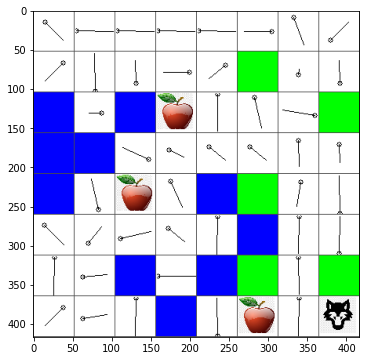

In [43]:
m.plot(Q)

## Vérification de la politique

Étant donné que la Q-Table répertorie "l'attractivité" de chaque action à chaque état, il est assez facile de l'utiliser pour définir une navigation efficace dans notre monde. Dans le cas le plus simple, il suffit de sélectionner l'action correspondant à la valeur la plus élevée de la Q-Table :


In [13]:
# code block 9

2

Si vous essayez le code ci-dessus plusieurs fois, vous remarquerez peut-être qu'il "se bloque" parfois, et vous devez appuyer sur le bouton STOP dans le notebook pour l'interrompre.

> **Tâche 1 :** Modifiez la fonction `walk` pour limiter la longueur maximale du chemin à un certain nombre d'étapes (par exemple, 100), et observez le code ci-dessus renvoyer cette valeur de temps en temps.

> **Tâche 2 :** Modifiez la fonction `walk` afin qu'elle n'aille pas dans des endroits où elle est déjà passée auparavant. Cela empêchera `walk` de boucler, cependant, l'agent peut toujours se retrouver "piégé" dans un endroit dont il ne peut pas s'échapper.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


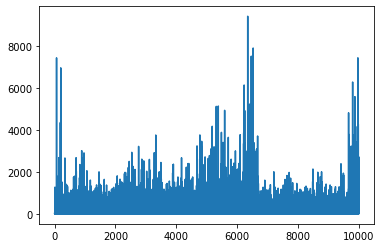

In [57]:
plt.plot(lpath)

## Exercice
## Un monde de Pierre et le Loup plus réaliste



---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de faire appel à une traduction humaine professionnelle. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
